In [1]:
import pandas as pd
df=pd.read_csv("C:/Users/Shrawani/OneDrive/Desktop/df.csv")
df.head()

,title,description
0,Help Desk Analyst- Tier II,Diagnose computer errors and triage to determi...
1,Clinical Research Associate II,Job Responsibilities:. . As a Clinical Res...
2,ETL Data Engineer with Oracle Data Integrator ...,Role: ETL Data Engineer with Oracle Data ...
3,OR COMM/DATA SUPPORT SPEC,Assumes primary responsibility of unit secreta...
4,Data Analyst - Intex Developer,Back to job search Data Analyst - Intex Dev...


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14409 entries, 0 to 14408
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        14409 non-null  object
 1   description  14409 non-null  object
dtypes: object(2)
memory usage: 225.3+ KB


In [3]:
df.columns

Index(['title', 'description'], dtype='object')

In [4]:
df['title'].value_counts().head(10)

title
Data Scientist               910
Data Analyst                 592
Machine Learning Engineer    367
Senior Data Scientist        231
Data Engineer                215
Senior Data Engineer         141
Senior Data Analyst          136
Business Analyst             102
Lead Data Scientist           77
Financial Analyst             62
Name: count, dtype: int64

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

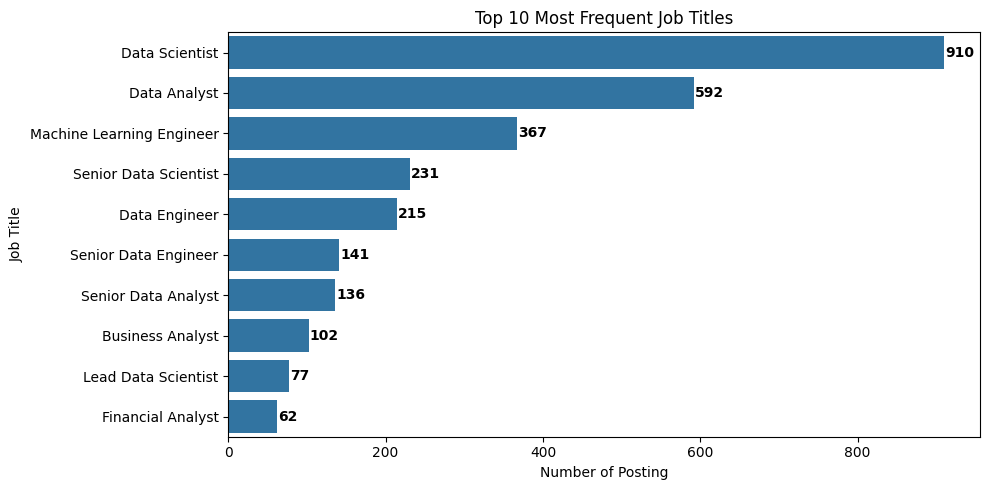

In [8]:
top_titles = df['title'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_titles.values,y=top_titles.index)
plt.title("Top 10 Most Frequent Job Titles")
plt.xlabel("Number of Posting")
plt.ylabel("Job Title")
plt.tight_layout()
for i, v in enumerate(top_titles.values):
    plt.text(v + 1, i, str(v), color='black', va='center', fontweight='bold')
plt.show()

In [18]:
from collections import Counter
import nltk
from nltk.corpus import stopwords
import re

In [19]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shrawani\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
stop_words=set(stopwords.words('english'))
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-zA-Z ]', '', text)
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return words
all_words=[]
for desc in df['description']:
    words = clean_text(desc)
    all_words.extend(words)
word_freq = Counter(all_words)
print(word_freq.most_common(20))

[('data', 108161), ('experience', 66269), ('work', 39815), ('business', 35799), ('team', 29319), ('skills', 27839), ('ability', 20429), ('years', 19490), ('management', 19048), ('support', 18656), ('including', 17910), ('analysis', 17390), ('job', 16981), ('development', 16837), ('information', 16305), ('working', 16179), ('knowledge', 15850), ('required', 15611), ('solutions', 15107), ('learning', 14978)]


In [25]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

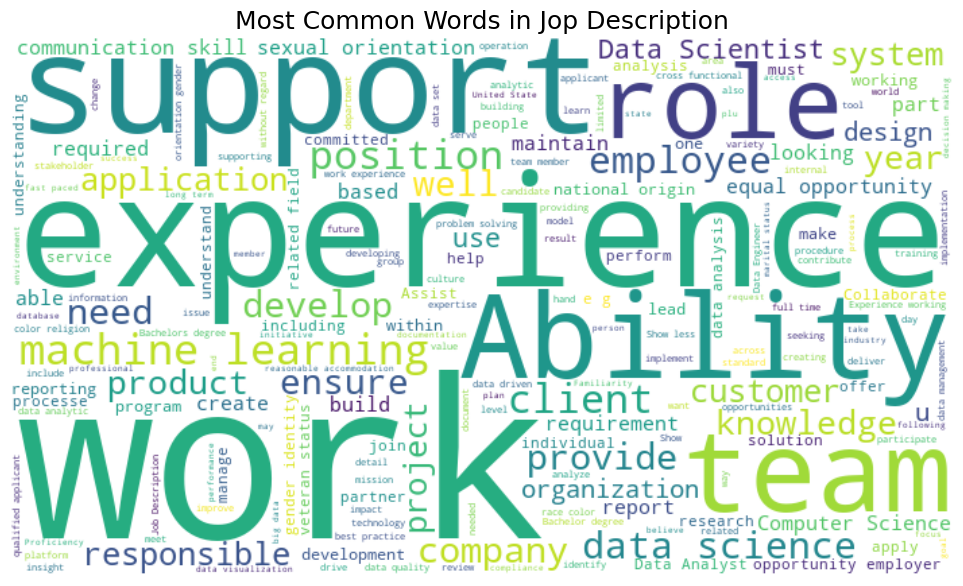

In [31]:
text = ' '.join(df['description'].dropna().astype(str).tolist())
wordcloud = WordCloud(width=700, height=400, background_color='white', stopwords=set(stopwords.words('english'))).generate(text)
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Words in Jop Description", fontsize=18)
plt.show()